In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization

In [2]:
max_features = 20000
maxlen = 80

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
          batch_size=256,
          epochs=2,
          validation_data=(x_test, y_test))

Epoch 1/2
98/98 [==============================] - 179s 2s/step - loss: 0.2810 - accuracy: 0.8848 - val_loss: 0.3928 - val_accuracy: 0.8340
Epoch 2/2
98/98 [==============================] - 193s 2s/step - loss: 0.2171 - accuracy: 0.9171 - val_loss: 0.3670 - val_accuracy: 0.8412


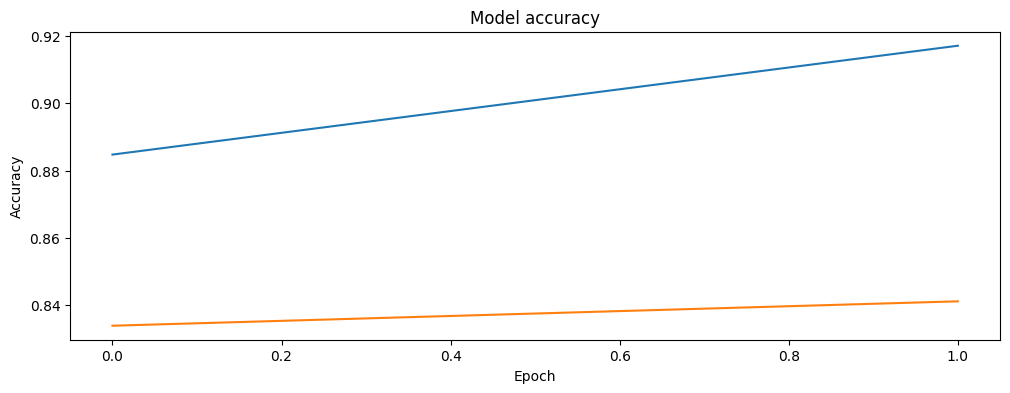

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

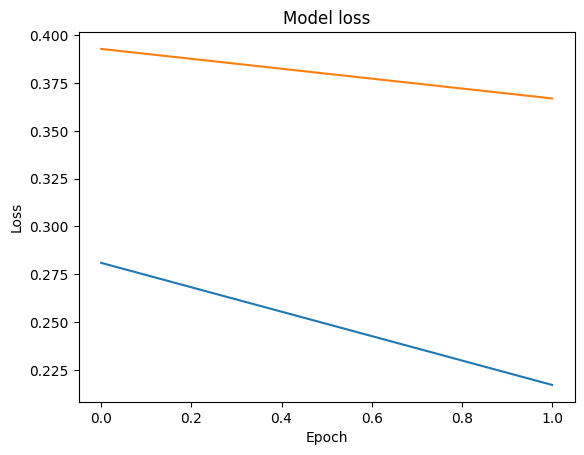

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Añade más complejidad

In [17]:
max_features = 20000
maxlen = 80

In [18]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [19]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [20]:
model = Sequential()
model.add(Embedding(max_features, 256))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train,
          batch_size=256,
          epochs=3,
          validation_data=(x_test, y_test))

Epoch 1/3
98/98 [==============================] - 345s 3s/step - loss: 0.4764 - accuracy: 0.7649 - val_loss: 0.6136 - val_accuracy: 0.8285
Epoch 2/3
98/98 [==============================] - 345s 4s/step - loss: 0.2819 - accuracy: 0.8854 - val_loss: 0.5308 - val_accuracy: 0.8055
Epoch 3/3
98/98 [==============================] - 342s 3s/step - loss: 0.2008 - accuracy: 0.9232 - val_loss: 0.3974 - val_accuracy: 0.8230


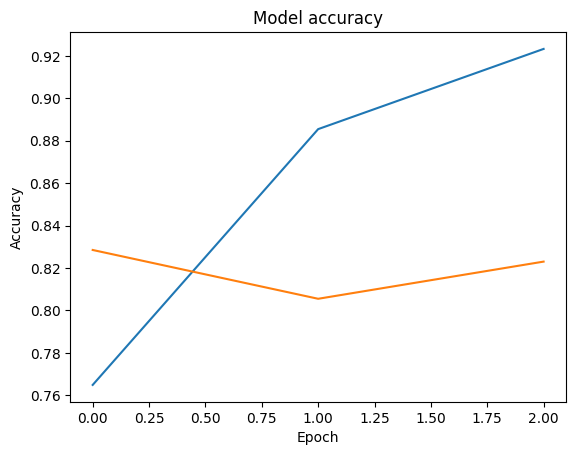

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

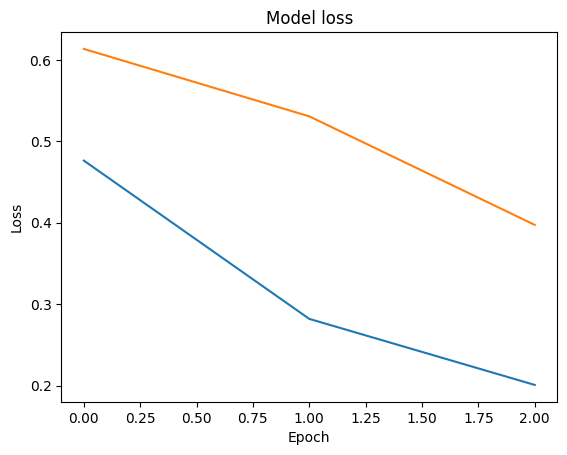

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# GRU

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [36]:
max_words = 5000
max_sequence_length = 300
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [39]:
max_words = 5000
max_sequence_length = 300
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [40]:
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [41]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(GRU(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, epochs=3, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/3
196/196 [==============================] - 547s 3s/step - loss: 0.4732 - accuracy: 0.7566 - val_loss: 0.3419 - val_accuracy: 0.8525
Epoch 2/3
196/196 [==============================] - 560s 3s/step - loss: 0.2890 - accuracy: 0.8824 - val_loss: 0.3006 - val_accuracy: 0.8795
Epoch 3/3
196/196 [==============================] - 575s 3s/step - loss: 0.2333 - accuracy: 0.9094 - val_loss: 0.2977 - val_accuracy: 0.8800


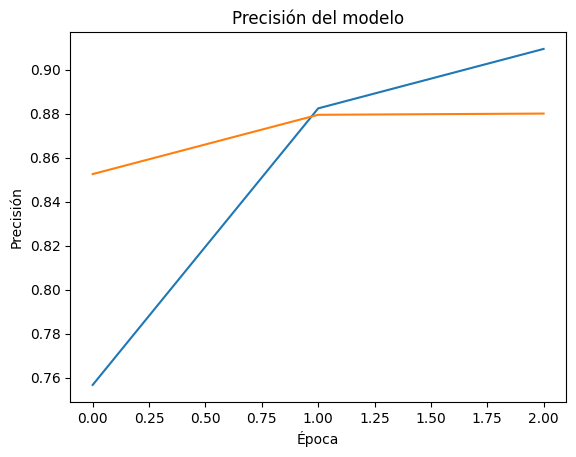

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

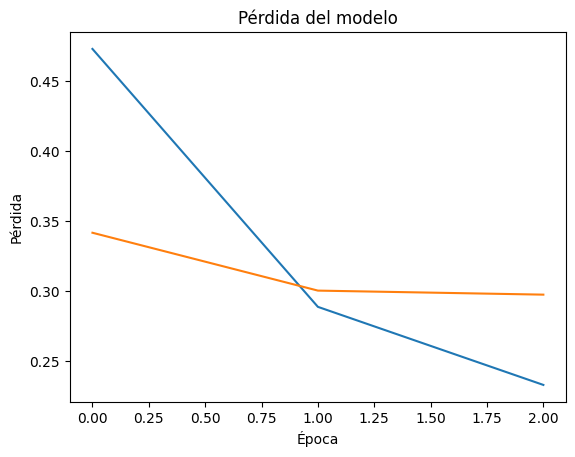

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()